In [1]:
using LinearAlgebra
include("readclassjson.jl")
data = readclassjson("tomo_data.json")

Dict{Any,Any} with 6 entries:
  "line_pixel_lengths" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … …
  "N"                  => 1225
  "lines_theta"        => [0.0897598, 0.0897598, 0.0897598, 0.0897598, 0.089759…
  "lines_d"            => [-20.4, -19.2, -18.0, -16.8, -15.6, -14.4, -13.2, -12…
  "npixels"            => 30
  "y"                  => [1.30826, -0.602414, 0.164969, -0.364747, 816.49, 354…

In [2]:
line_pixel_lengths = data["line_pixel_lengths"]
N = data["N"]
n = data["npixels"]
y = data["y"]

1225-element Array{Float64,1}:
    1.30825614119438
   -0.6024136726846079
    0.1649691871966391
   -0.3647466035716365
  816.4895885298691
 3541.394054766618
 6801.987431087812
 7104.704736017815
 7099.284946517137
 7062.077397074949
 5744.641244865698
 4472.571757508679
 5243.792244953569
    ⋮
 5163.418620904073
 5925.010521356998
 7068.832804919793
 7077.147011520406
 6870.901476204619
 5810.181951581548
 6166.353639012499
    0.262420364032049
   -0.02070267824515479
    0.8154484628239705
    1.282997847047444
   -0.3038336537569693

We want to find a 900-vector x, such that y is approximately Ax (, because v is small compared to y).

In [3]:
L = transpose(line_pixel_lengths)
N >= n^2

true

In [4]:
rank(L) == n^2

true

L is full-rank and is a thin matrix, so x_approximated = (((L^T)L)^-1)(L^T)y.

In [5]:
x_approximated = (inv(transpose(L)*L)*transpose(L))*y

900-element Array{Float64,1}:
 211.78961151566236
  22.910227111583872
 105.91197272228251
 254.90777228861037
 254.9940338264323
 255.5157058466238
 254.0942110945146
 254.1455389977408
 255.05940259867367
 255.5182801490608
 254.76561983027705
 255.23879980510875
 241.00930383080697
   ⋮
 241.326572892128
 254.67694750600043
 255.03267906712938
 255.4745695421318
 240.9736792613852
 104.81001897781834
  22.50981718032557
   7.518179514757691
  41.58279675898049
 139.16951019512695
 250.60569833416366
 255.069739197162

We will then convert the pixel densities 900-vector, x, into pixel densities 30x30-matrix in order to aid visualization.

In [6]:
X = reshape(x_approximated , n , n)

30×30 Array{Float64,2}:
 211.79    118.307      50.8629   …  255.028      255.324     254.749
  22.9102    0.328723   39.8778      255.22       254.854     254.901
 105.912   206.523     255.018       255.544      254.569     255.211
 254.908   255.846     254.386       255.359      255.098     254.677
 254.994   256.108     254.955       254.097      254.558     254.874
 255.516   254.883     255.066    …  255.006      254.319     255.184
 254.094   254.849     255.067       255.915      254.984     254.843
 254.146   255.876     255.925       253.938      254.592     254.75
 255.059   253.586     254.795       256.604      256.114     256.406
 255.518   255.001     258.816       252.288      253.444     255.073
 254.766   254.847     175.017    …  252.551      255.458     255.406
 255.239   200.382       4.69938     256.637      254.463     254.315
 241.009    30.1906     11.7411      251.155      253.332     256.103
   ⋮                              ⋱                           
 256

In [7]:
using Plots

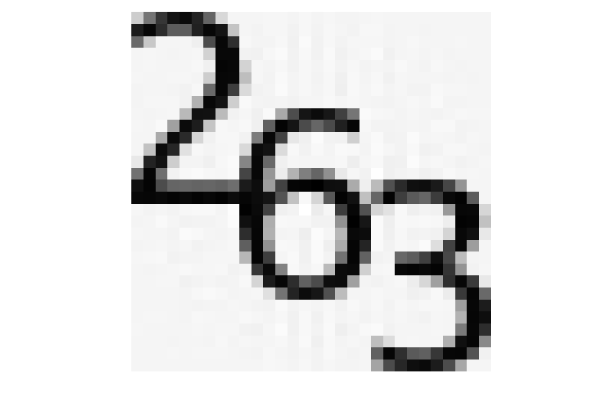

In [8]:
heatmap(X, yflip=true, aspect_ratio=:equal, color=:gist_gray, cbar=:none, framestyle=:none)